# 【自前AI講座】 LASSO / Ridge 回帰 / ElasticNet の理論／数式／コード実装

---

## 理論

Lp ノルム：
$$
\|\boldsymbol{x}\|_p
  := \left( \sum_{i=1}^{n} |x_i|^p \right)^{\frac{1}{p}}
  = \sqrt[p]{|x_1|^p +|x_2|^p + \cdots + |x_n|^p}
$$

n = 2 のときの L1 ノルム：
$$
\|\boldsymbol{x}\|_1
  := \left( \sum_{i=1}^{2} |x_i|^1 \right)^{\frac{1}{1}}
  = |x_1| +|x_2|
$$

n = 2 のときの L2 ノルム：
$$
\|\boldsymbol{x}\|_2
  := \left( \sum_{i=1}^{2} |x_i|^2 \right)^{\frac{1}{2}}
  = \sqrt{|x_1|^2 +|x_2|^2}
$$

### LASSO (Least Absolute Shrinkage and Selection Operator):

$$
E_{LASSO}(\boldsymbol{w}) = \sum_{i=1}^{n}{\left( y_i - \hat{y_i} \right)^2} + \alpha \| \boldsymbol{w} \|_1
$$

ここで，$E_{LASSO}(\boldsymbol{w})$ は最小化させたい誤差関数，$y$ は正解の値，$\hat{y}$ は予測値（説明変数 $x_i$ と回帰係数＝重み $w_i$ の線形結合： $\hat{y_i} = w_i x_i$），$\alpha$ は正則化の強さを調整できるハイパーパラメータで，右辺第１項が最小二乗コスト関数，右辺第２項が正則化項で L1 正則化を表します．  
正則化項は，「モデルのパラメータの重みに追加の制約を与える」という文脈で「ペナルティ項」とも呼ばれます．

### Ridge 回帰:

$$
E_{Ridge}(\boldsymbol{w}) = \sum_{i=1}^{n}{\left( y_i - \hat{y_i} \right)^2} + \alpha \| \boldsymbol{w} \|_2
$$

LASSO との違いは，右辺第２項の正則化項が L2 ノルムになっているところです．

### Elastic Net:

$$
E_{ElasticNet}(\boldsymbol{w}) = \sum_{i=1}^{n}{\left( y_i - \hat{y_i} \right)^2} + r \alpha \| \boldsymbol{w} \|_1 + (1 - r) \alpha \| \boldsymbol{w} \|_2
$$

LASSO との違いは，右辺第２項の正則化に L1 ノルム，第３項の正則化に L2 ノルムを用いているところで，LASSO と Ridge 回帰を係数 $r \ (0 \le r \le 1)$  によってバランスさせています．  
この $r$ もハイパーパラメータになります．

---

## コード実装

LASSO (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) :

```
sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')  
- alpha=1.0： (float) 正則化の強さを調整するハイパーパラメータで，alpha は [0, inf) の値である必要があります．
- fit_intercept=True： (bool) 切片を計算する場合は True，切片を 0 として計算する場合は False にします．
- max_iter=1000： (int) 計算の最大反復回数を指定します．
- tol=0.0001： (float) 最適化の許容範囲を指定します．この値以下になるか max_iter に到達するまで計算します．
- positive=False： (bool) True にすると係数が強制的に正になります．
- random_state=None： (int) 乱数シードを設定します．
- selection='cyclic'： (str) "cyclic" の場合は説明変数を順番に用い，"random" の場合は反復計算のたびにランダム係数が更新されます．"random" の場合は，特に tol=0.0001 よりも高い場合に収束が高速化されやすくなるそうです．

他の引数については気にしなくて OK です．
```

Ridge / RidgeClassifier (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html) :

```
sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)　　
- alpha=1.0： (float) 正則化の強さを調整するハイパーパラメータで，alpha は [0, inf) の値である必要があります．
- fit_intercept=True： (bool) 切片を計算する場合は True，切片を 0 として計算する場合は False にします．
- max_iter=None： (int) 計算の最大反復回数を指定します．None の場合はパラメータ "solver" の設定によって変わり，solver が "sparse_cg", "lsqr" のとき scipy.sparse.linalg の設定値に依存し, "sag" では 1000, "lbfgs" では 15000 になります．
- tol=0.0001： (float) 最適化の許容範囲を指定します．この値以下になるか max_iter に到達するまで計算します．
- solver='auto'： (str) 以下のソルバーが選択できます．
    - "auto"： データによって自動で決定します．
    - "svd"： Singular Value Decomposition
    - "cholesky"： scipy.linalg.solve
    - "sparse_cg"： scipy.sparse.linalg.cg
    - "lsqr"： scipy.sparse.linalg.lsqr
    - "sag"： Stochastic Average Gradient descent
    - "saga"： "sag" の改良版
    - "lbfgs"： scipy.optimize.minimize
- positive=False： (bool) True にすると係数が強制的に正になります．
- random_state=None： (int) 乱数シードを設定します．

他の引数については気にしなくて OK です．
```

```
sklearn.linear_model.RidgeClassifier(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, class_weight=None, solver='auto', positive=False, random_state=None)
- alpha=1.0： (float) 正則化の強さを調整するハイパーパラメータで，alpha は [0, inf) の値である必要があります．
- fit_intercept=True： (bool) 切片を計算する場合は True，切片を 0 として計算する場合は False にします．
- max_iter=None： (int) 計算の最大反復回数を指定します．None の場合はパラメータ "solver" の設定によって変わり，solver が "sparse_cg", "lsqr" のとき scipy.sparse.linalg の設定値に依存し, "sag" では 1000, "lbfgs" では 15000 になります．
- tol=0.0001： (float) 最適化の許容範囲を指定します．この値以下になるか max_iter に到達するまで計算します．
- class_weight=None： (dict or "balanced") 辞書型を使って {class_label: weight} といったフォーマットで各クラスの重みを定義できます．デフォルトの None の場合，重みは全てのクラスに対して 1 が適用されます．"balanced" の場合は y の値を使用して，n_samples / (n_classes * np.bincount(y)) のように入力データのクラス頻度に反比例するように重みを自動的に調整します．
- solver='auto'： (str) 以下のソルバーが選択できます．
    - "auto"： データによって自動で決定します．
    - "svd"： Singular Value Decomposition
    - "cholesky"： scipy.linalg.solve
    - "sparse_cg"： scipy.sparse.linalg.cg
    - "lsqr"： scipy.sparse.linalg.lsqr
    - "sag"： Stochastic Average Gradient descent
    - "saga"： "sag" の改良版
    - "lbfgs"： scipy.optimize.minimize
- positive=False： (bool) True にすると係数が強制的に正になります．
- random_state=None： (int) 乱数シードを設定します．

他の引数については気にしなくて OK です．
```

ElasticNet (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) :

```
sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
- alpha=1.0： (float) L1 正則化の強さを調整するハイパーパラメータで，alpha は [0, inf) の値である必要があります．
- l1_ratio=0.5： (float) L1 正則化と L2 正則化の割合を調整するハイパーパラメータで，l1_ratio は [0, 1] の値である必要があります．l1_ratio=1.0 のときは L1 正則化のみ行い L2 正則化は適用されません．
- fit_intercept=True： (bool) 切片を計算する場合は True，切片を 0 として計算する場合は False にします．
- max_iter=1000： (int) 計算の最大反復回数を指定します．
- tol=0.0001： (float) 最適化の許容範囲を指定します．この値以下になるか max_iter に到達するまで計算します．
- positive=False： (bool) True にすると係数が強制的に正になります．
- random_state=None： (int) 乱数シードを設定します．
- selection='cyclic'： (str) "cyclic" の場合は説明変数を順番に用い，"random" の場合は反復計算のたびにランダム係数が更新されます．"random" の場合は，特に tol=0.0001 よりも高い場合に収束が高速化されやすくなるそうです．

他の引数については気にしなくて OK です．
```

scikit-learn 自体の使い方は同じなので，ここでは LASSO のみについてライブラリの使用例を示します．

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import Lasso

In [22]:
# 離散点 x, y を定義
x = np.arange(0, 5).reshape(-1, 1)
y = np.array([5, 2, 4, 3, 1])

In [23]:
model = Lasso(alpha=1.0, random_state=0)

In [24]:
model.fit(X=x, y=y)

Lasso(random_state=0)

In [25]:
y_pred = model.predict(x)
y_pred

array([3.4, 3.2, 3. , 2.8, 2.6])

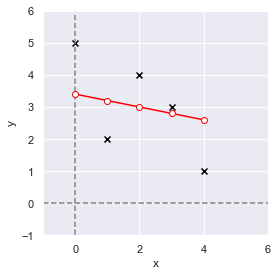

In [26]:
fig = plt.figure(facecolor="white")
ax = plt.axes()
ax.axvline(x=0, color="gray", linestyle="--")
ax.axhline(y=0, color="gray", linestyle="--")
ax.plot(x, y_pred, color="red", marker="o", markerfacecolor="white")
ax.scatter(x, y, color="black", marker="x")
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(aspect="equal")
fig.tight_layout()
plt.show()

In [27]:
rng = np.random.RandomState(seed=0)

x = np.arange(start=0, stop=100 + 0.1, step=0.1)
y = x + rng.uniform(low=-5, high=5, size=len(x))
x = x.reshape(-1, 1)

print(x.shape, y.shape)

(1001, 1) (1001,)


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(600, 1) (401, 1) (600,) (401,)


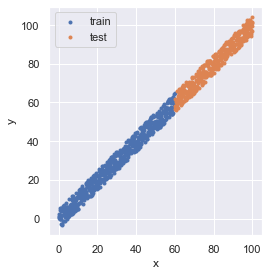

In [29]:
fig = plt.figure(facecolor="white")
ax = plt.axes()
ax.scatter(x_train, y_train, marker=".", label="train")
ax.scatter(x_test, y_test, marker=".", label="test")
ax.set_aspect(aspect="equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc="upper left")
fig.tight_layout()
plt.show()

In [32]:
model = Lasso(alpha=1.0, random_state=0)
model.fit(X=x_train, y=y_train)
y_pred = model.predict(x)

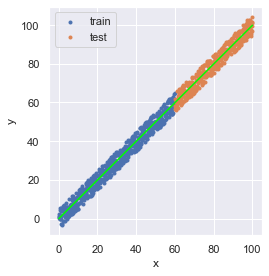

In [33]:
fig = plt.figure(facecolor="white")
ax = plt.axes()
ax.scatter(x_train, y_train, marker=".", label="train")
ax.scatter(x_test, y_test, marker=".", label="test")
ax.plot(x, y_pred, color="lime")
ax.set_aspect(aspect="equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc="upper left")
fig.tight_layout()
plt.show()

---

## 演習問題

Q1. ワインデータセットについて，以下を参照して，目的変数であるワインの等級を LASSO によって求めてください．

- データ分割は train_test_split にて行い，学習用データは全データの 90 %，データのシャッフルは True としてください（結果に再現性を持たせたい場合は，引数 random_state に任意の数を設定してください）
- データは，以下のコードにて読み込むことができます（データの説明はこちら：https://slash-z.com/matplotlib-first-step/）

```python
from sklearn.datasets import load_wine

df_x, df_y = load_wine(return_X_y=True, as_frame=True)
```

Q2. 上記で学習したモデルを用いて，df_x 全データについて推論を計算し，分類精度を計算しましょう．
LASSO を用いる場合，分類問題に無理やり回帰を用いていることから，推論結果は float となるため，例えば推論結果に .astype(np.uint8) としてカテゴリ変数に変換してください．
for / if 文を用いても精度は計算できますが，scikit-learn を用いて分類問題における認識精度を確認するには，以下のようにして算出が可能です．
ここで，y_true は正解ラベルの df_y，y_pred には df_x に対するモデルの推論結果を代入してください．

```python
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true, y_pred))
```

Q3. 上記の結果について，他の linear_model である　LinearRegression, Lasso, RidgeClassifier, ElasticNet で認識精度を比較してみましょう．注意として RidgeClassifier のみクラス分類できるモデルになっているため，Q2 で対応した .astype(np.uint8) とする処理は不要です．

Q4. カリフォルニア住宅価格データセットについて，LASSO を用いて以下の手順で住宅価格を予測してみましょう．
- 次のコードでデータ読み込み，学習用／検証用にデータを分割します．

```python
from sklearn.datasets import fetch_california_housing

df_x, df_y = fetch_california_housing(return_X_y=True, as_frame=True)
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.25, shuffle=True, random_state=0,
)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
```

- 学習用データ (x_train, y_train) のみを学習し，検証用データ x_test について住宅価格を予測しましょう．
- 上記で予測した住宅価格について，正解の値との絶対平均誤差を算出してみましょう．

以下のコードにて絶対平均誤差が算出できます．
ここで，y_true は正解データの y_test，y_pred には x_test に対するモデルの推論結果を代入してください．

```python
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_true, y_pred))
```

Q5. 上記の結果について，他の linear_model である　LinearRegression, Lasso, Ridge, ElasticNet で認識精度を比較してみましょう．今回は回帰問題で誤差を算出しているので，誤差が小さいほど良い精度で予測しています．